In [1]:
# https://data.bls.gov/timeseries/LNS14000000
# https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1410028701
# https://appsso.eurostat.ec.europa.eu/nui/show.do
# https://www.abs.gov.au/ausstats/abs@.nsf/7d12b0f6763c78caca257061001cc588/a8e6e58c3550090eca2582ce00152250!OpenDocument
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabula import convert_into

In [2]:
# Assessed Contributions - Membership contributions
convert_into('data/2020-21_AC_Summary.pdf', 'data/Assessed_Contrib_1.csv', 
                  output_format='csv', pages='all')

Got stderr: Apr 20, 2020 11:38:03 AM org.apache.pdfbox.pdmodel.font.PDCIDFontType2 <init>
INFO: OpenType Layout tables used in font ArialMT are not implemented in PDFBox and will be ignored



In [3]:
# Voluntary contributions by Nations
convert_into('data/A71_INF2-en.pdf', 'data/Voluntary_contrib.csv', 
                  output_format='csv', pages=[4,5,6])

In [4]:
# Voluntary contribution by organizations
convert_into('data/A71_INF2-en.pdf', 'data/Voluntary_contrib_2.csv', 
                  output_format='csv', pages=[7, 8, 9, 10, 11, 12, 13])

After Converting the .pdf files to .csv, I used Excel to remove redundant rows (Totals, Labels, Texts...), and saved a new .csv UTF-8

In [5]:
# get labels for a list of ticks
def get_labels(x):
    labels = []
    for val in x:
        if val < 1000000:
            i = str(val/1000)
            if i[-1] == '0':
                i = i [:-2]
            labels.append( i +'k')
        elif val < 1000000000:
            i = str(val/1000000)
            if i[-1] == '0':
                i = i [:-2]
            labels.append( i+'mi')
        else:
            i = str(val/1000000000)
            if i[-1] == '0':
                i = i [:-2]
            labels.append( i+'bi')
    return labels

# get a dataframe with the rank plus a sum of others 
def get_rank(df, rank, col='Total'):
    names = ['Others']
    total = df.sum()[col]
    other_v = total - df[col][rank:].sum()
    values = [other_v]

    for i in df[col][rank:].values:
        values.append(i)

    for n in df['Contributor'][rank:].values:
        names.append(n)

    df = pd.DataFrame(names)
    df['Total'] = values
    df.columns = ['Contributor', 'Total']
    return df



In [6]:
df_a = pd.read_csv('data/Assessed_Contrib_2020_2021.csv', thousands=',')

df_a = df_a[['Members and Associate Members', 'Net contributions payable for 2020-2021']]
cols = ['Contributor', 'Net Contributions']
df_a.columns = ['Contributor', 'Net Contributions']
df_a = df_a.sort_values('Net Contributions').reset_index()[cols]
df_a['Contributor'] = df_a['Contributor'].apply(lambda x: x.replace('\r', ' '))

In [7]:
df_vn = pd.read_csv('data/Voluntary_contrib_2017.csv', thousands=' ')
df_vn = df_vn[['Contributor', 'Total']]
df_vn = df_vn.sort_values('Total').reset_index()[['Contributor', 'Total']]
df_vn['Contributor'] = df_vn['Contributor'].apply(lambda x: x.replace('\r', ' '))

In [8]:
df_vc = pd.read_csv('data/Voluntary_contrib_2017_2.csv', thousands=' ')
df_vc = df_vc[['Contributor', 'Total']]
df_vc = df_vc.sort_values('Total').reset_index()[['Contributor', 'Total']]
df_vc['Contributor'] = df_vc['Contributor'].apply(lambda x: x.replace('\r', ' '))

In [9]:
countries = {'United States of America':'US', 
    'United Kingdom of Great Britain and Northern Ireland':'UK',
     'Russian Federation': 'Russia',
     'Republic of Korea': 'South Korea'}

def short_names(df):
    ids = df[df['Contributor'].isin(countries.keys())].index

    for i in ids:
        df.iloc[i,0] = countries[df.iloc[i]['Contributor']]

short_names(df_a)
short_names(df_vn)

In [10]:
orgs = {'United Nations Office for Project Services (UNOPS)':'UNOPS',
       'GlaxoSmithKline (GSK)':'GSK',
       'United Nations Fund for International Partnerships (UNFIP)':'UNFIP',
       'Joint United Nations Programme on HIV/AIDS (UNAIDS)':'UNAIDS',
       'United Nations Children’s Fund (UNICEF)':'UNICEF',
       'Global Fund to Fight AIDS, Tuberculosis and Malaria (GFATM)':'GFATM',
       'United Nations Development Programme (UNDP)':'UNDP',
       'United Nations Central Emergency Response Fund (CERF)':'CERF',
       'United Nations Office for the Coordination of Humanitarian Affairs (UNOCHA)':'UNOCHA',
       'National Philanthropic Trust (NPT)':'NPT',}

def short_names_c(df):
    ids = df[df['Contributor'].isin(orgs.keys())].index

    for i in ids:
        df.iloc[i,0] = orgs[df.iloc[i]['Contributor']]

short_names_c(df_vc)

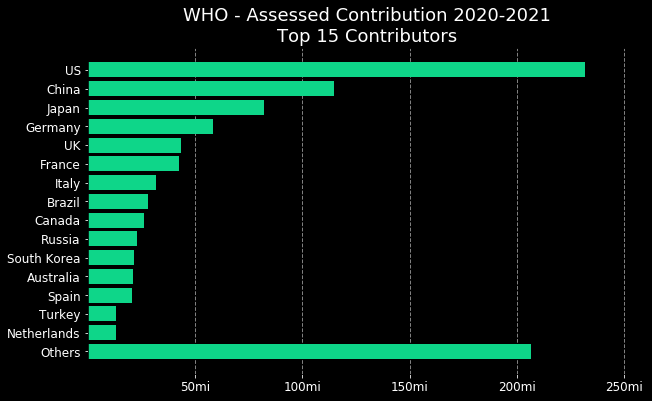

In [30]:
fig, ax = plt.subplots(1, figsize=(10, 6), facecolor='black')

plt.barh(get_rank(df_a, -15, col='Net Contributions')['Contributor'], 
         get_rank(df_a, -15, col='Net Contributions')['Total'],
         color='#0ED689')

x = np.arange(50000000,250000001,50000000)
labels = get_labels(x)

plt.xticks(x, labels=labels, fontsize=12)
plt.yticks(fontsize=12)

plt.xlim(0,260000000)

#Colors and Sizes
ax.set_facecolor('xkcd:black')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.yaxis.label.set_color('white')
ax.xaxis.label.set_color('white')

# grid
ax.grid(color='grey', linestyle='dashed', linewidth=1, axis = 'x')
ax.set_axisbelow(True)

title = 'WHO - Assessed Contribution 2020-2021\nTop 15 Contributors'
plt.title(title, color='white', fontsize=18)
plt.savefig('img/who_assessed.png', facecolor='black', edgecolor='none')
plt.show()

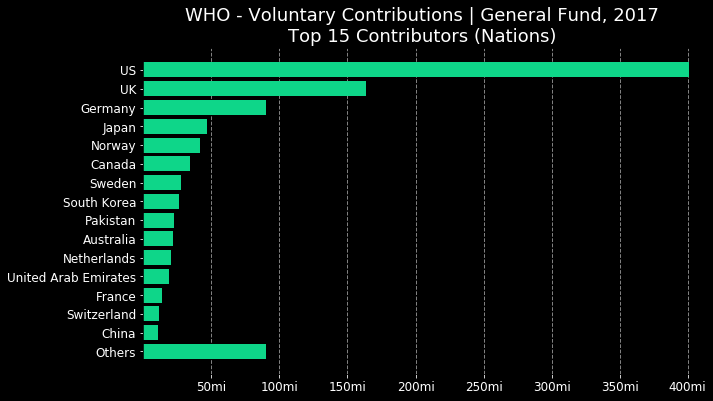

In [12]:
fig, ax = plt.subplots(1, figsize=(10, 6), facecolor='black')

plt.barh(get_rank(df_vn, -15)['Contributor'], 
         get_rank(df_vn, -15)['Total'],
         color='#0ED689')

x = np.arange(50000000, 400000001,50000000)
labels = get_labels(x)

plt.xticks(x, labels=labels, fontsize=12)
plt.yticks(fontsize=12)

plt.xlim(0,410000001)

#Colors and Sizes
ax.set_facecolor('xkcd:black')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.yaxis.label.set_color('white')
ax.xaxis.label.set_color('white')

# grid
ax.grid(color='grey', linestyle='dashed', linewidth=1, axis = 'x')
ax.set_axisbelow(True)

title = 'WHO - Voluntary Contributions | General Fund, 2017\nTop 15 Contributors (Nations)'
plt.title(title, color='white', fontsize=18)
#plt.savefig('img/who_vol_nat.png', facecolor='black', edgecolor='none')
plt.show()

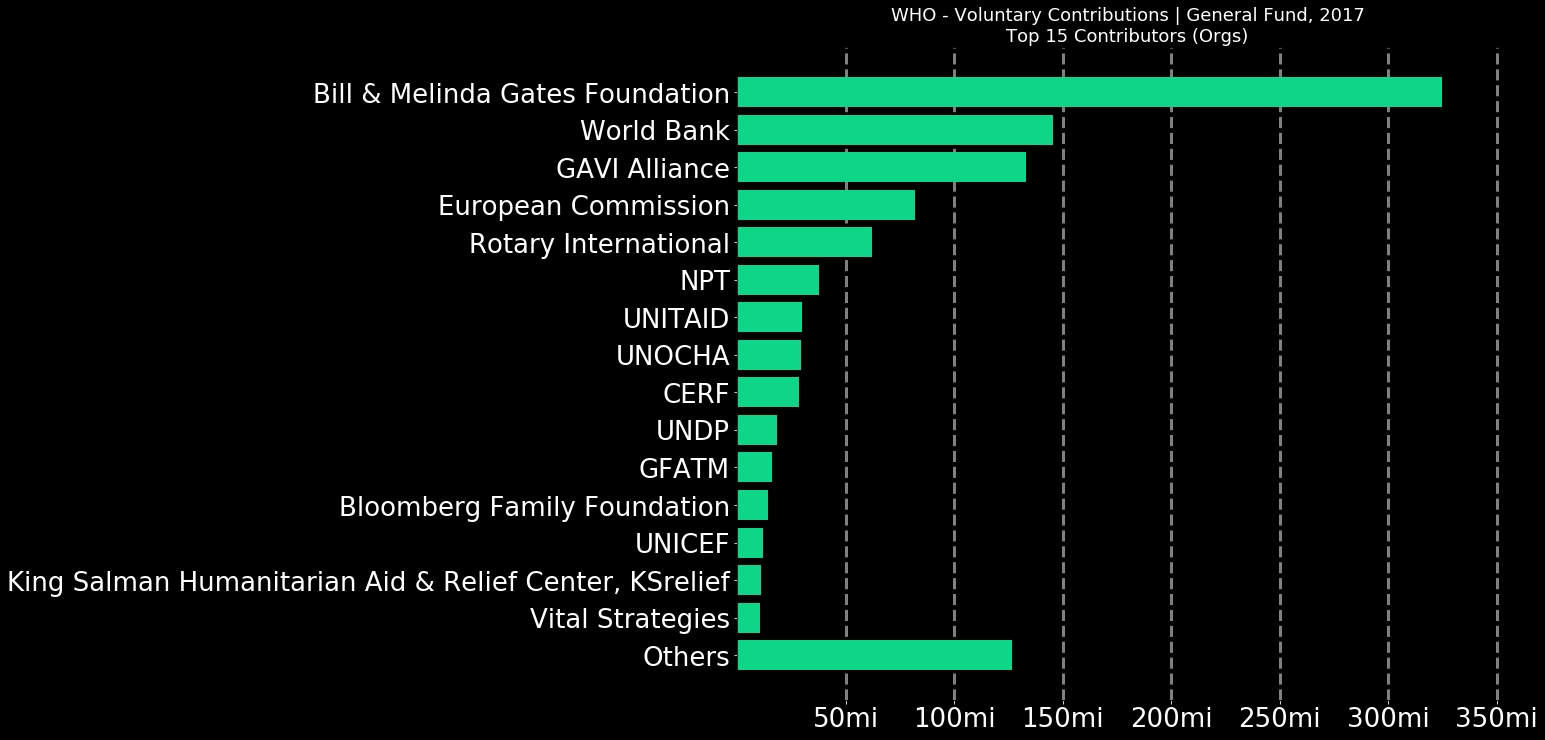

In [13]:
fig, ax = plt.subplots(1, figsize=(14, 12), facecolor='black')

plt.barh(get_rank(df_vc, -15)['Contributor'], 
         get_rank(df_vc, -15)['Total'],
         color='#0ED689')

x = np.arange(50000000,350000001,50000000)
labels = get_labels(x)

plt.xticks(x, labels=labels, fontsize=26)
plt.yticks(fontsize=26)

plt.xlim(0,360000000)

#Colors and Sizes
ax.set_facecolor('xkcd:black')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.yaxis.label.set_color('white')
ax.xaxis.label.set_color('white')

# grid
ax.grid(color='grey', linestyle='dashed', linewidth=3, axis = 'x')
ax.set_axisbelow(True)

title = 'WHO - Voluntary Contributions | General Fund, 2017\nTop 15 Contributors (Orgs)'
plt.title(title, color='white', fontsize=18)
#plt.savefig('img/who_vol_org.png', facecolor='black', edgecolor='none')
plt.show()

In [15]:
vc = get_rank(df_vc, -20)
vn = get_rank(df_vn, -20)

top_v = pd.concat([vc, vn]).sort_values('Total')[-22:]

others = pd.concat([vc, vn]).sort_values('Total')[:-22].sum()['Total'] + top_v[top_v['Contributor'].isin(['Others'])].sum()['Total']

names = ['Others'] + top_v[~top_v['Contributor'].isin(['Others'])]['Contributor'].values.tolist()
values = [others] + top_v[~top_v['Contributor'].isin(['Others'])]['Total'].values.tolist()

df = pd.DataFrame(names)
df['Total'] = values
df.columns = ['Contributor', 'Total']
df

,Contributor,Total
0,Others,353326710
1,Netherlands,20292848
2,Australia,22063471
3,Pakistan,22575509
4,South Korea,26086352
5,Sweden,27674186
6,CERF,28315905
7,UNOCHA,29278343
8,UNITAID,29919017
9,Canada,34413899


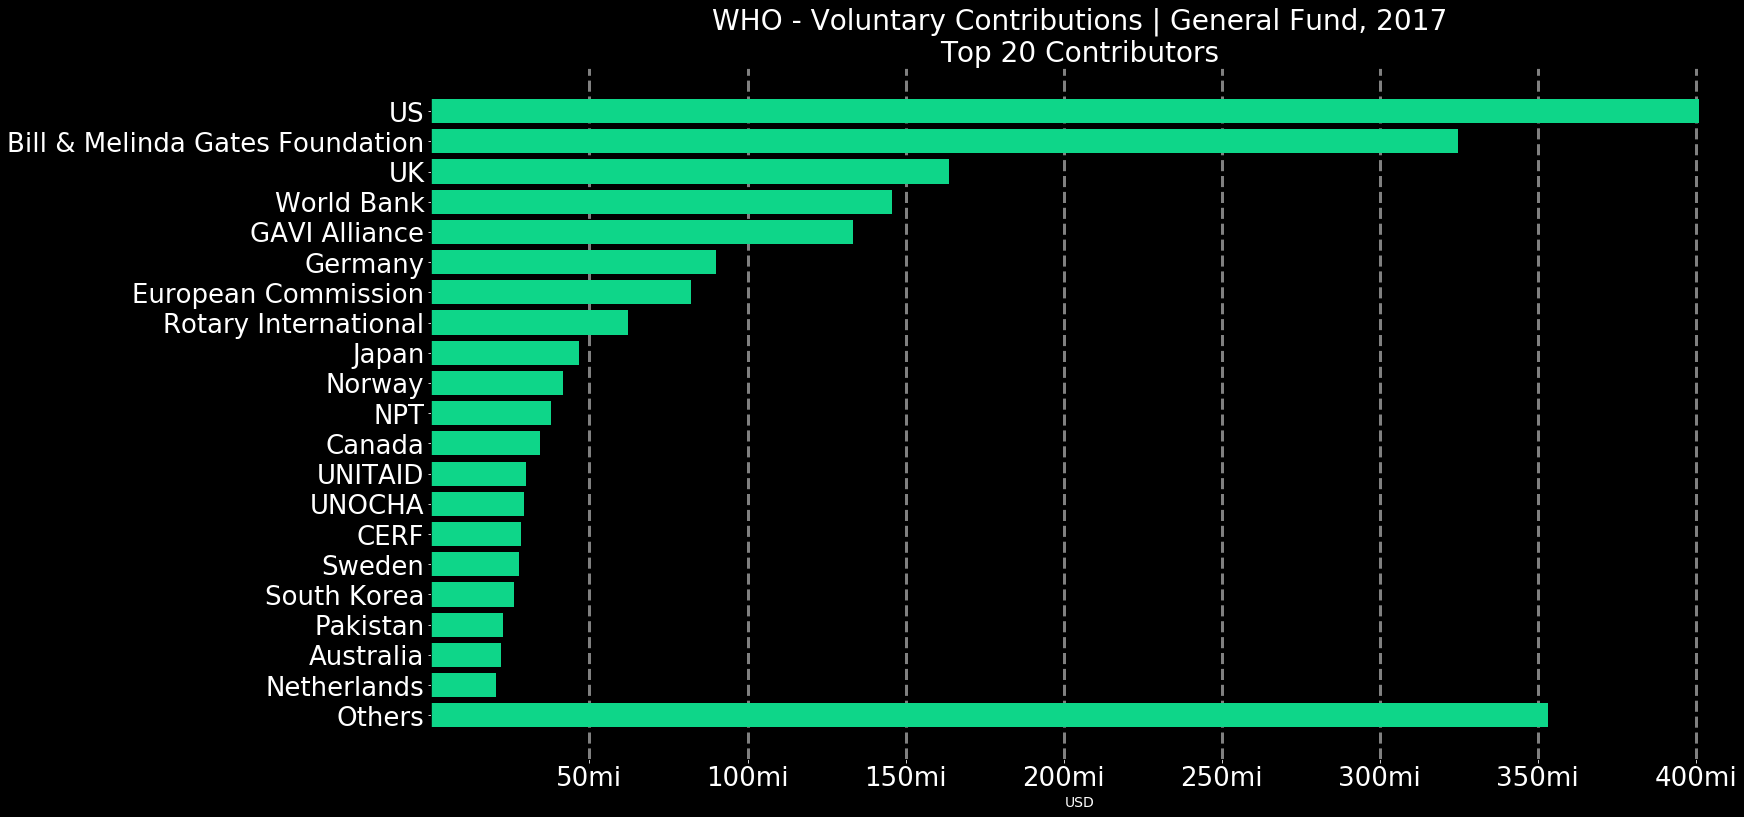

In [29]:
fig, ax = plt.subplots(1, figsize=(24, 12), facecolor='black')

plt.barh(df['Contributor'], df['Total'],
         color='#0ED689')

x = np.arange(50000000,400000001,50000000)
labels = get_labels(x)

plt.xticks(x, labels=labels, fontsize=26)
plt.yticks(fontsize=26)

plt.xlim(0,410000000)
plt.xlabel('USD', color='white', fontsize=14)

#Colors and Sizes
ax.set_facecolor('xkcd:black')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.yaxis.label.set_color('white')
ax.xaxis.label.set_color('white')

# grid
ax.grid(color='grey', linestyle='dashed', linewidth=3, axis = 'x')
ax.set_axisbelow(True)

title = 'WHO - Voluntary Contributions | General Fund, 2017\nTop 20 Contributors'
plt.title(title, color='white', fontsize=28)
plt.subplots_adjust(left=0.25, right=1, top=0.9, bottom=0.1)
#plt.show()
plt.savefig('img/who_vol.png', facecolor='black', edgecolor='none')